In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_train_flatten.shape

#x_test_flatten = x_test.reshape(x_test.shape[0], -1) 

(60000, 784)

In [4]:
from griddify import FeatureDistances

fd = FeatureDistances(metric="cosine").calculate(x_train_flatten)

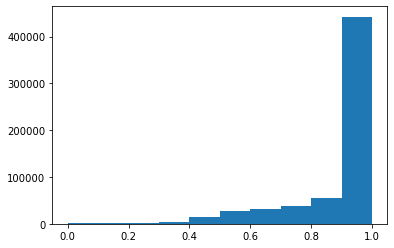

In [5]:
plt.hist(fd.to_numpy().flatten().tolist())
plt.show()

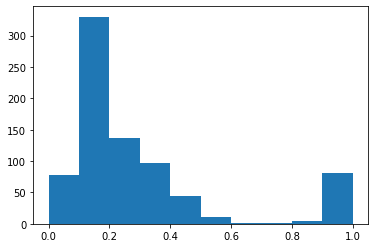

In [6]:
minimums = []
for i in range(fd.shape[0]):
    row = fd[i].to_numpy()
    minimums.append(np.min(row[np.nonzero(row)]))
    
plt.hist(minimums)
plt.show()

In [7]:
from griddify import Tabular2Cloud

tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)

<AxesSubplot:>

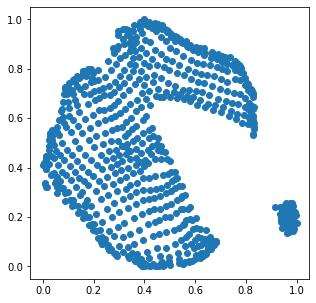

In [8]:
from griddify.plots import cloud_plot

cloud_plot(Xc)

In [9]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
Xg = cg.transform(Xc, as_integers=False)

<AxesSubplot:>

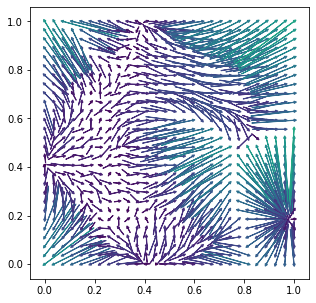

In [10]:
from griddify.plots import arrows_plot

arrows_plot(Xc, Xg, capping_distance=0.5)

In [11]:
mappings, side = cg.get_mappings(Xc)

In [12]:
from griddify import Flat2Grid

tg = Flat2Grid(mappings, side)
Xi = tg.transform(x_train_flatten)

100%|██████████| 60000/60000 [01:19<00:00, 750.73it/s] 


<AxesSubplot:>

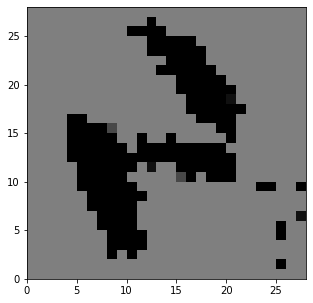

In [16]:
from griddify.plots import grid_plot

grid_plot(Xi[0], cmap='gray_r')

<Figure size 864x720 with 0 Axes>

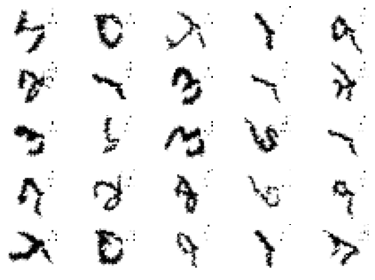

In [14]:
plt.figure(figsize=(12, 10))
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(Xi[i].T, cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 864x720 with 0 Axes>

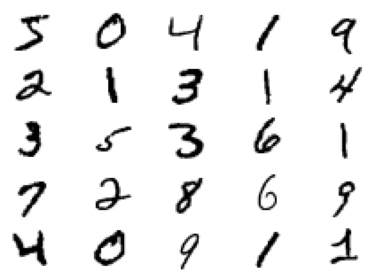

In [15]:
plt.figure(figsize=(12, 10))
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)